In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features_df = pd.read_csv('../data/processed/features.csv')

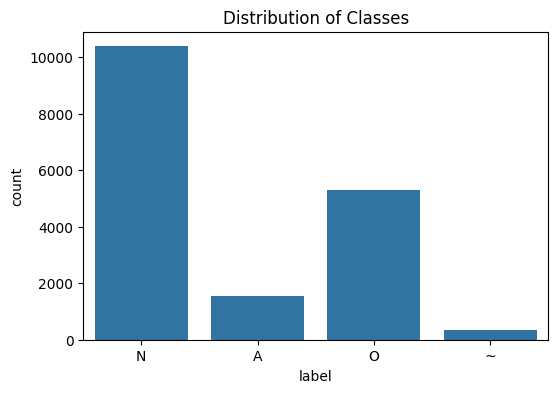

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=features_df)
plt.title('Distribution of Classes')
plt.show()

## Class Distribution in ECG Data

- **N**: Represents Normal rhythm cases.
- **A**: Stands for Atrial fibrillation cases.
- **O**: Denotes Other rhythm cases.
- **~**: Signifies Noisy recordings.

From the chart, we observe that:

- The Normal (N) class is the most prevalent in the dataset, with the highest count.
- Atrial fibrillation (A) cases are significantly fewer than Normal but present in moderate numbers.
- Other rhythm cases (O) have a lower presence compared to Normal, yet they are still a sizable portion of the dataset.
- Noisy recordings (~) are the least represented class, indicating a smaller number of these cases.

This distribution has implications for the classification model's training process:

- The imbalance suggests that accuracy alone might not be the best performance metric, as it could be heavily biased towards the Normal class.
- The model might require techniques to address class imbalance, such as resampling methods or adjusted class weights.
- Evaluation metrics like precision, recall, F1-score, and confusion matrices will be essential to assess the model's performance across all classes.


## Pairplot Analysis of ECG Features

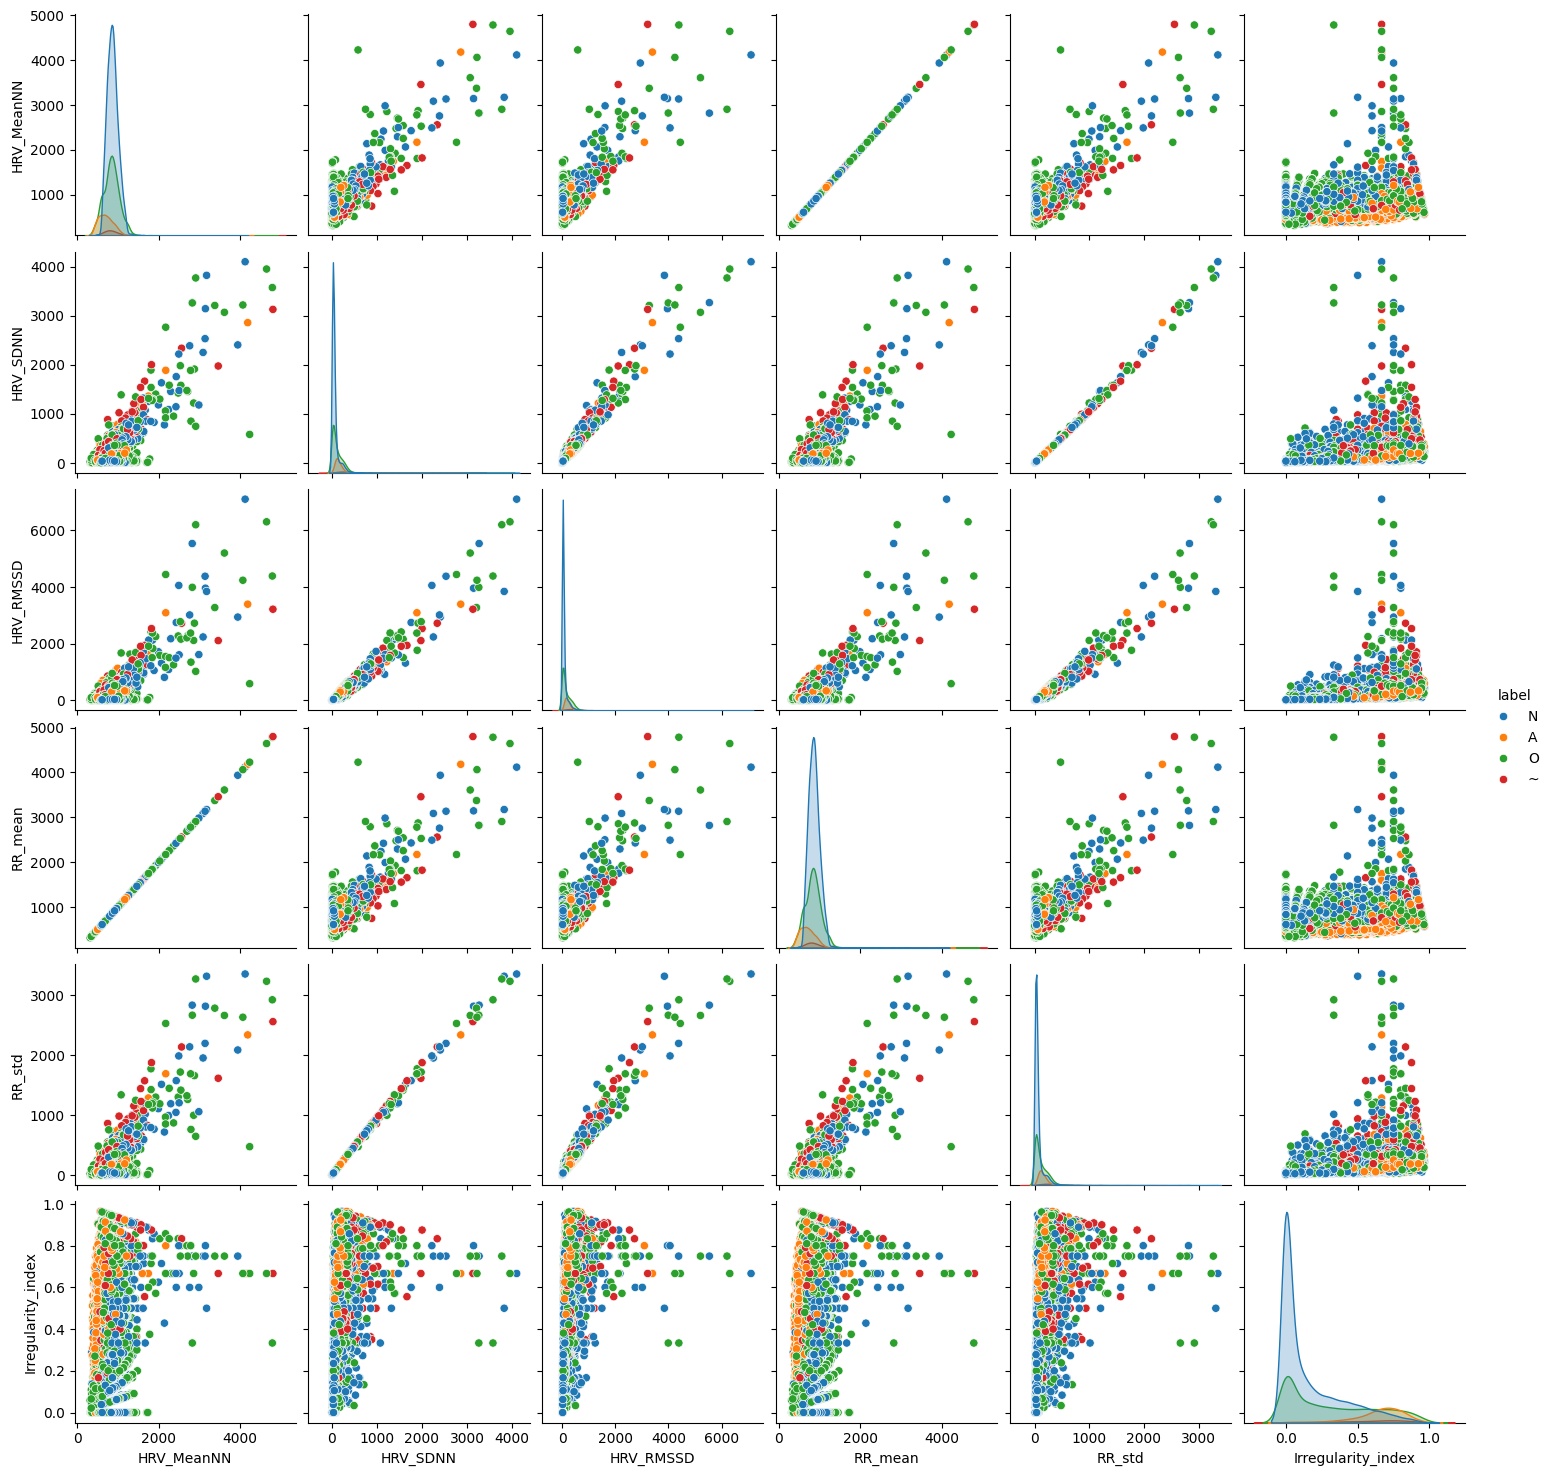

In [4]:
subset_features = ['HRV_MeanNN', 'HRV_SDNN', 'HRV_RMSSD', 'RR_mean', 'RR_std', 'Irregularity_index', 'label']
sns.pairplot(features_df[subset_features], hue='label')
plt.show()

### Insights from the Pairplot:

- The histograms on the diagonal show that features like 'HRV_SDNN', 'HRV_RMSSD', and 'RR_std' have a right-skewed distribution for Normal (N) and Other rhythms (O), suggesting higher variability in these classes.
  
- 'RR_mean' exhibits a relatively more uniform distribution across all classes, but with a slightly higher concentration of lower values for the Atrial Fibrillation (A) class.
  
- The 'Irregularity_index' histograms and scatter plots indicate a distinct separation between Normal (N) rhythms and Atrial Fibrillation (A) classes, with the latter showing higher values of irregularity. This might be a strong feature to differentiate between Normal and AF classes.
  
- Scatter plots reveal varying degrees of correlation between features. For example, 'HRV_MeanNN' and 'HRV_RMSSD' show a positive correlation, which is more pronounced in the Normal (N) class.
  
- The plots for 'HRV_MeanNN' against 'RR_std' and 'RR_mean' show clusters of higher density for the Normal (N) class, which could suggest a relationship between the average heartbeat interval and its variability in normal rhythms.

### Considerations for Classification Modeling:

- The overlap in scatter plots between Atrial Fibrillation (A) and Other rhythms (O) suggests that some features might not individually distinguish these classes well, highlighting the potential need for combining features or engineering new ones for improved classification.
  
- The clear separation in some plots between Normal (N) and Atrial Fibrillation (A), especially using 'Irregularity_index', suggests that this feature could be particularly useful for detecting AF.
  
- Class imbalance is evident, with Normal (N) class dominating. This will need to be accounted for in model training to avoid bias.

### Conclusion:

The pairplot analysis indicates that while some features may provide clear class separability, others may require more sophisticated modeling techniques to aid in distinguishing between the different rhythm types. The presence of class imbalance and feature overlap will need to be addressed during the model development phase.

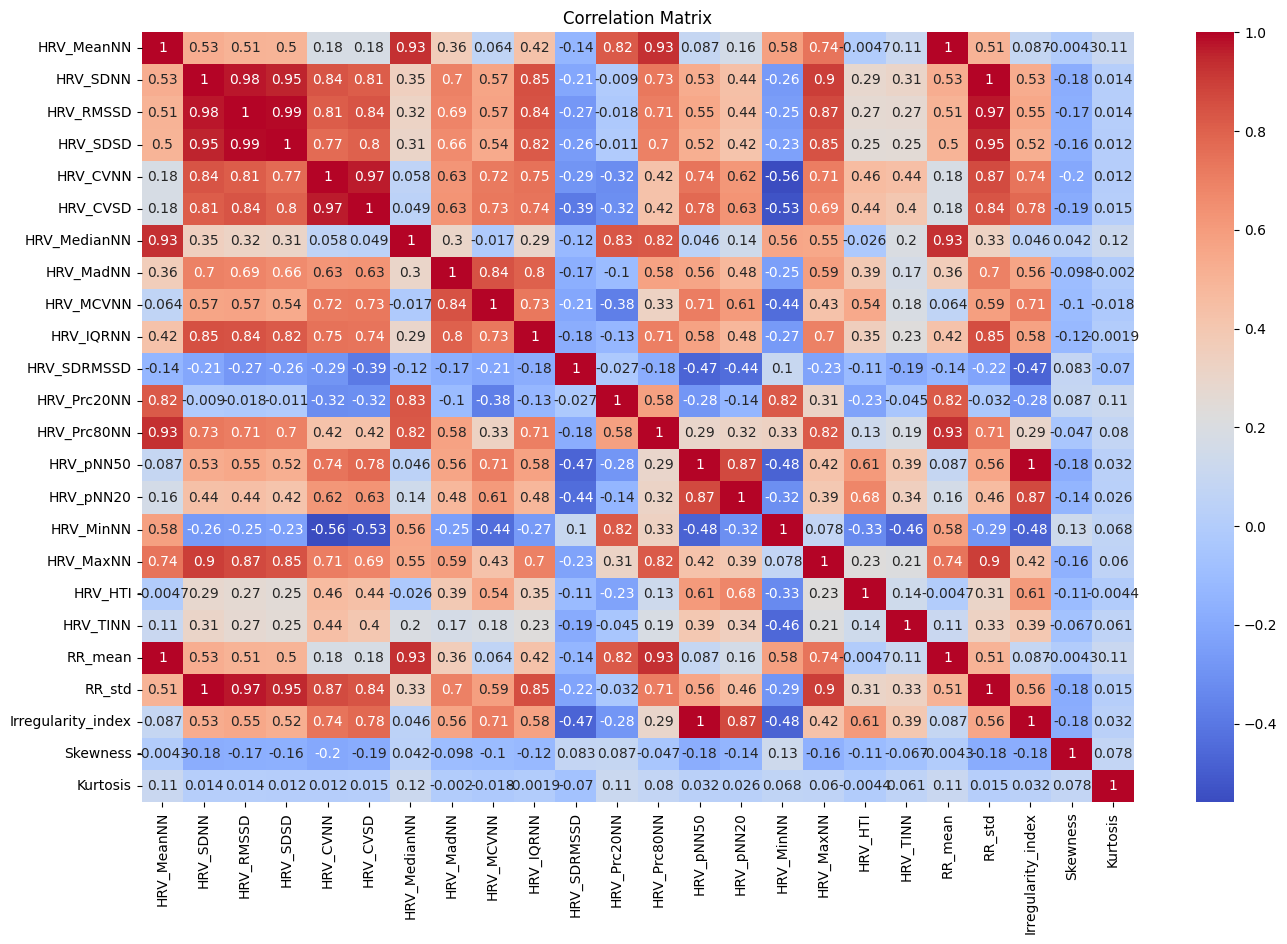

In [5]:
# Correlation matrix
plt.figure(figsize=(16, 10))
correlation_matrix = features_df.drop(columns=['label']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

High Positive Correlation (Red): Features such as 'HRV_MeanNN' and 'HRV_MaxNN' have a high positive correlation.

High Negative Correlation (Blue): 'HRV_MeanNN' shows a negative correlation with 'HRV_SDNN', 'HRV_RMSSD', and 'HRV_SDSD', as indicated by the blue color.

No or Low Correlation (White/Neutral): Features like 'HRV_MeanNN' and 'Kurtosis' show little to no correlation, as indicated by the white or neutral color and a value close to 0. This suggests that variations in one feature do not reliably predict changes in the other.

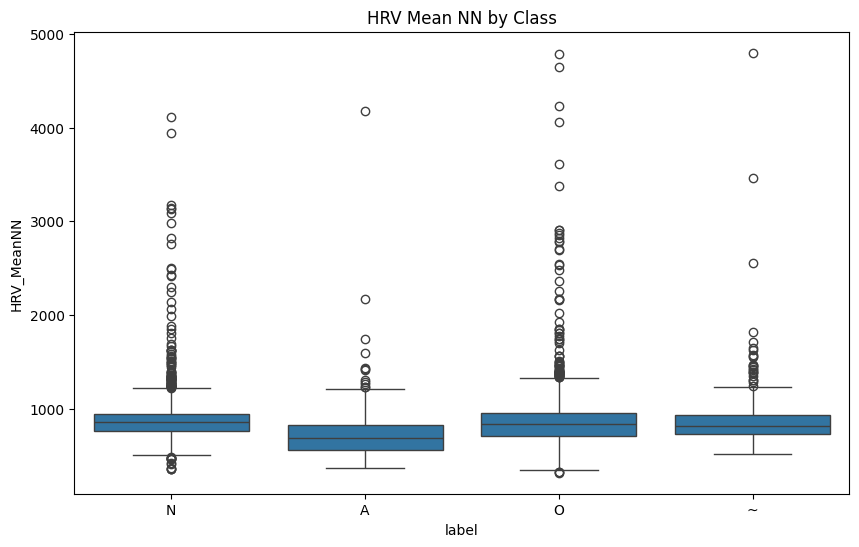

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='HRV_MeanNN', data=features_df)
plt.title('HRV Mean NN by Class')
plt.show()

In [9]:
median_HRV_MeanNN = features_df.groupby('label')['HRV_MeanNN'].median()
median_HRV_MeanNN

label
A    679.848485
N    851.929825
O    835.438596
~    812.745098
Name: HRV_MeanNN, dtype: float64

Atrial Fibrillation (A): The Atrial Fibrillation class has the lowest median HRV Mean NN value of 679.85 milliseconds. This lower median suggests that heartbeats occur more frequently on average in AF cases, which aligns with the clinical presentation of atrial fibrillation where the atrial rate can be quite rapid and irregular.

Normal (N): The Normal class shows a higher median HRV Mean NN value of 851.93 milliseconds. This suggests a slower and more regular heartbeat interval on average, which is consistent with normal sinus rhythm.

Other Rhythms (O): This class has a median HRV Mean NN of 835.44 milliseconds, slightly less than the Normal class, indicating that other rhythm categories may have a marginally higher heartbeat frequency than normal rhythm but are not as rapid as atrial fibrillation.

Noisy (~): The Noisy recordings have a median HRV Mean NN value of 812.75 milliseconds. These recordings may include a mix of different types of noise and artifacts, hence the variability in HRV Mean NN values might be influenced by factors other than the underlying heart rhythm.